# Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# Preprocessing

## Training

In [2]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train_2',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 42643 files belonging to 23 classes.


## Validation

In [4]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid_2',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10660 files belonging to 23 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 23), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Model

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model= Sequential()

In [10]:
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=32,kernel_size=3,padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=512,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(kernel_regularizer=tf.keras.regularizers.l2(0.001), filters=512,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.40))

In [17]:
model.add(Dense(units=23,activation='softmax'))

## Compiling the model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=1.0, learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

## Training the Model

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

training_label=model.fit(x=training_set,validation_data=validation_set,epochs=40,callbacks= [early_stop])

Epoch 1/40
2666/2666 [==============================] - 163s 61ms/step - loss: 0.2431 - accuracy: 0.9682 - val_loss: 0.3743 - val_accuracy: 0.9386
Epoch 2/40
2666/2666 [==============================] - 162s 61ms/step - loss: 0.2164 - accuracy: 0.9711 - val_loss: 0.3114 - val_accuracy: 0.9508
Epoch 3/40
2666/2666 [==============================] - 161s 60ms/step - loss: 0.2061 - accuracy: 0.9728 - val_loss: 0.2740 - val_accuracy: 0.9552
Epoch 4/40
2666/2666 [==============================] - 160s 60ms/step - loss: 0.1964 - accuracy: 0.9724 - val_loss: 0.2479 - val_accuracy: 0.9605
Epoch 5/40
2666/2666 [==============================] - 161s 61ms/step - loss: 0.1786 - accuracy: 0.9758 - val_loss: 0.2595 - val_accuracy: 0.9606
Epoch 6/40
2666/2666 [==============================] - 161s 60ms/step - loss: 0.1747 - accuracy: 0.9763 - val_loss: 0.2448 - val_accuracy: 0.9598
Epoch 7/40
2666/2666 [==============================] - 160s 60ms/step - loss: 0.1604 - accuracy: 0.9775 - val_loss: 0

## Evaluation

In [22]:
train_loss,train_accuracy=model.evaluate(training_set)

2666/2666 [==============================] - 46s 17ms/step - loss: 0.0958 - accuracy: 0.9908


In [23]:
print(train_loss,train_accuracy)

0.09582868963479996 0.9908308386802673


In [24]:
val_loss,val_accuracy=model.evaluate(validation_set)

667/667 [==============================] - 12s 17ms/step - loss: 0.2055 - accuracy: 0.9629


In [25]:
print(val_loss,val_accuracy)

0.20553001761436462 0.9628517627716064


## Model Save

In [26]:
model.save("Good_model96.keras")

In [27]:
training_label.history

{'loss': [0.24313154816627502,
  0.21637029945850372,
  0.2061457484960556,
  0.19639042019844055,
  0.1786421239376068,
  0.1747213453054428,
  0.16035039722919464,
  0.1524406373500824,
  0.15182390809059143,
  0.14190229773521423,
  0.13408857583999634,
  0.13181620836257935,
  0.12550701200962067,
  0.123015858232975,
  0.11567234247922897,
  0.11444857716560364,
  0.11097391694784164],
 'accuracy': [0.9681776762008667,
  0.9711324572563171,
  0.9727973937988281,
  0.972422182559967,
  0.9757990837097168,
  0.9762915372848511,
  0.9775344133377075,
  0.9796449542045593,
  0.9776047468185425,
  0.9793635606765747,
  0.9812630414962769,
  0.9809113144874573,
  0.982013463973999,
  0.9818727374076843,
  0.9832329154014587,
  0.9837722778320312,
  0.9837018847465515],
 'val_loss': [0.374266654253006,
  0.3113507628440857,
  0.2740430235862732,
  0.24793507158756256,
  0.25953739881515503,
  0.2448200285434723,
  0.24363967776298523,
  0.2092861384153366,
  0.2430620938539505,
  0.21465

## Saving the history data

In [28]:
import json
with open("Good_model96.json","w") as file:
    json.dump(training_label.history,file)

## Visualisation

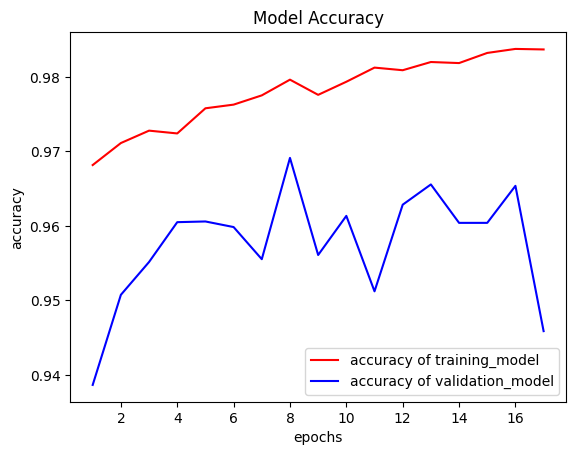

In [30]:
epochs= [i for i in range(1,18)]
plt.title("Model Accuracy")
plt.plot(epochs, training_label.history['accuracy'],color='red',label='accuracy of training_model')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs, training_label.history['val_accuracy'],color='blue',label='accuracy of validation_model')

plt.legend()
plt.savefig("GoodModel96.jpg")
plt.show()

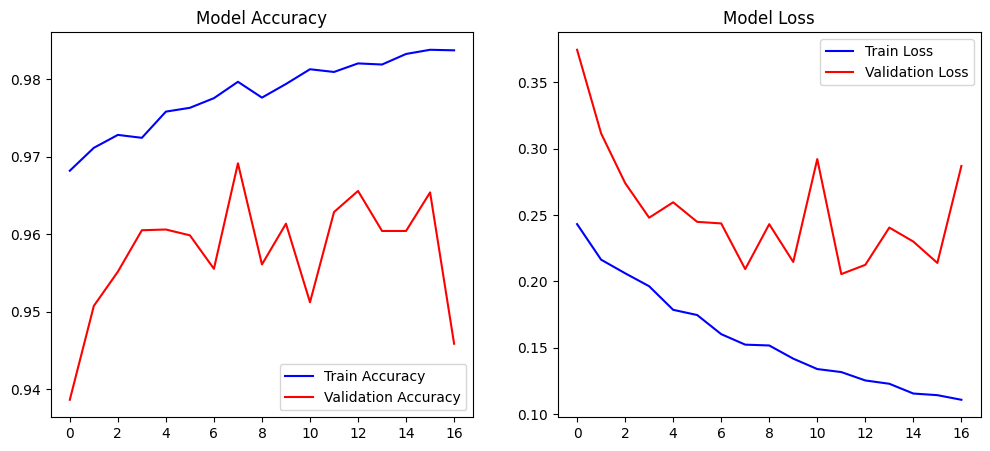

In [31]:
def plot_learning_curves(training_label):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(training_label.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(training_label.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.legend()
    plt.title("Model Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(training_label.history['loss'], label='Train Loss', color='blue')
    plt.plot(training_label.history['val_loss'], label='Validation Loss', color='red')
    plt.legend()
    plt.title("Model Loss")
    plt.savefig("Model96.jpg")
    plt.show()

plot_learning_curves(training_label)

In [8]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [2]:
classes=[
    "Apple Scab",
    "Apple Black Rot",
    "Apple Cedar Apple Rust",
    "Apple Healthy",
    "Cherry (Including Sour) Powdery Mildew",
    "Cherry (Including Sour) Healthy",
    "Corn (Maize) Cercospora Leaf Spot/Grey Leaf",
    "Corn (Maize) Common Rust",
    "Corn (Maize) Northern Leaf Blight"
    "Corn (Maize) Healthy",
    "Potato Early Blight",
    "Potato Late Blight",
    "Potato Healthy",
    "Tomato Bacterial Spot",
    "Tomato Early Blight",
    "Tomato Late Blight",
    "Tomato Leaf Mold",
    "Tomato Septoria Leaf Spot",
    "Tomato Spider Mites/two spotted",
    "Tomato Target Spot",
    "Tomato Yellow Leaf Curl Virus",
    "Tomato Mosaic Virus",
    "Tomato Healthy"
]

In [3]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'test_2',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=20,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5211 files belonging to 23 classes.


In [7]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

163/163 [==============================] - 4s 27ms/step


(array([[1.0000000e+00, 1.5781603e-09, 3.9667413e-18, ..., 1.7414612e-22,
         1.4773098e-19, 6.3063286e-16],
        [1.0000000e+00, 8.7100067e-12, 2.6687667e-18, ..., 8.3120607e-25,
         2.5410825e-21, 1.3696408e-18],
        [1.0000000e+00, 3.3505346e-13, 1.7410742e-18, ..., 3.0514863e-25,
         4.7737672e-20, 7.2653953e-17],
        ...,
        [1.4283357e-19, 9.4774128e-24, 4.4493742e-25, ..., 2.7361603e-35,
         7.6347599e-27, 1.0000000e+00],
        [4.1437014e-11, 5.4944290e-16, 1.0529740e-09, ..., 2.6186273e-10,
         2.4847724e-10, 9.9998331e-01],
        [1.9747779e-14, 7.3332063e-16, 4.4732235e-13, ..., 1.4110490e-17,
         1.7367976e-16, 1.0000000e+00]], dtype=float32),
 (5211, 23))

In [9]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [10]:
predicted_categories

<tf.Tensor: shape=(5211,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)>

In [11]:
true_categories=tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(5211, 23), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [12]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(5211,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)>

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [14]:
cm= confusion_matrix(y_true,predicted_categories)
cm

array([[245,   1,   0,   3,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 244,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 220,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 248,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0, 206,   0,   1,   0,   0,   0,   0,   0,   2,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0, 220,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 190,   1,   9,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2, 228,   0,   0,   0,   0,   0,
   

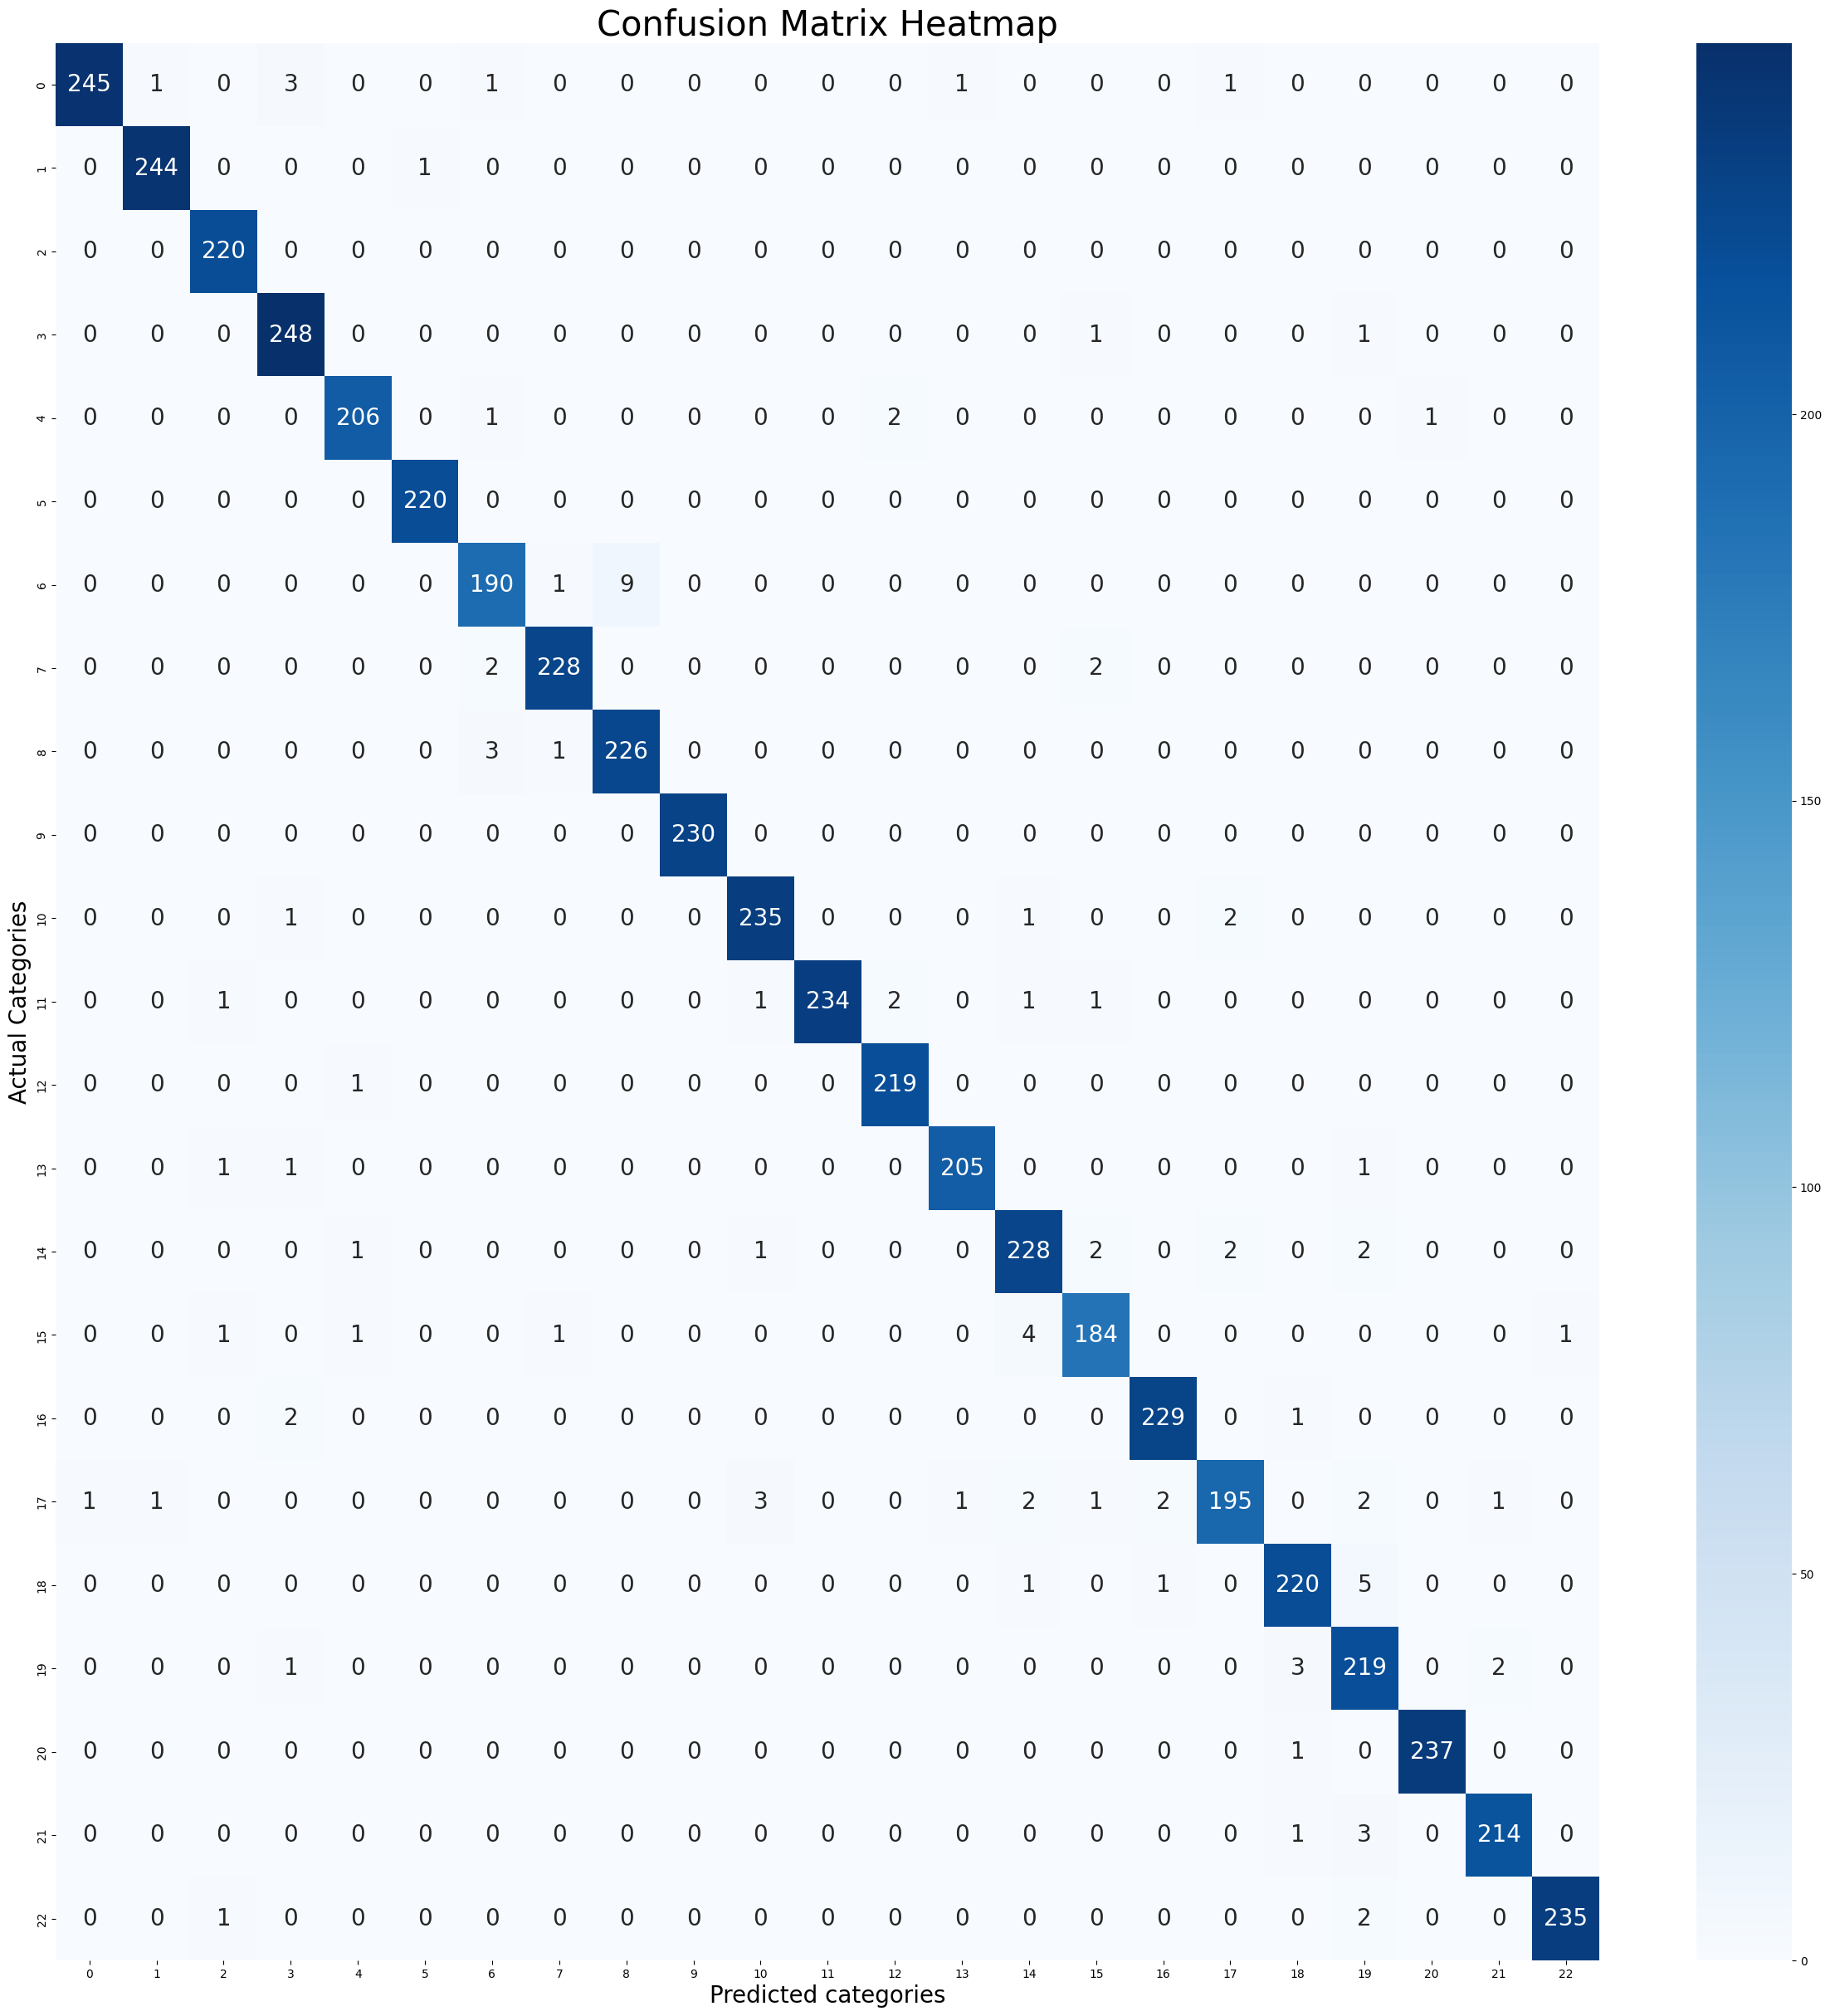

In [24]:
plt.figure(figsize=(30,30))
plt.title("Confusion Matrix Heatmap", fontsize=30)
sbn.heatmap(cm, annot=True, fmt="d", cmap="Blues",annot_kws={'size':20})
plt.xlabel("Predicted categories", fontsize=20)
plt.ylabel("Actual Categories", fontsize=20)
plt.savefig("Confusion Matrixfor96_2.jpg")
plt.show()

In [19]:
class_report=classification_report(y_true,predicted_categories,target_names=classes)
print(class_report)

                                             precision    recall  f1-score   support

                                 Apple Scab       0.98      0.93      0.95       504
                            Apple Black Rot       0.99      0.99      0.99       497
                     Apple Cedar Apple Rust       0.97      0.99      0.98       440
                              Apple Healthy       0.98      0.97      0.97       502
     Cherry (Including Sour) Powdery Mildew       0.98      1.00      0.99       421
            Cherry (Including Sour) Healthy       0.98      1.00      0.99       456
Corn (Maize) Cercospora Leaf Spot/Grey Leaf       0.95      0.93      0.94       410
                   Corn (Maize) Common Rust       0.99      0.99      0.99       477
          Corn (Maize) Northern Leaf Blight       0.95      0.98      0.96       477
                       Corn (Maize) Healthy       1.00      1.00      1.00       465
                        Potato Early Blight       0.97      0.98

In [72]:
with open("precision_report_my.txt","w") as file:
    file.write(class_report)

In [75]:
import pandas as pd
df=pd.read_csv("precision_report_my.txt")
df.to_csv("p_report_my.csv",index=None)

334/334 [==============================] - 9s 27ms/step


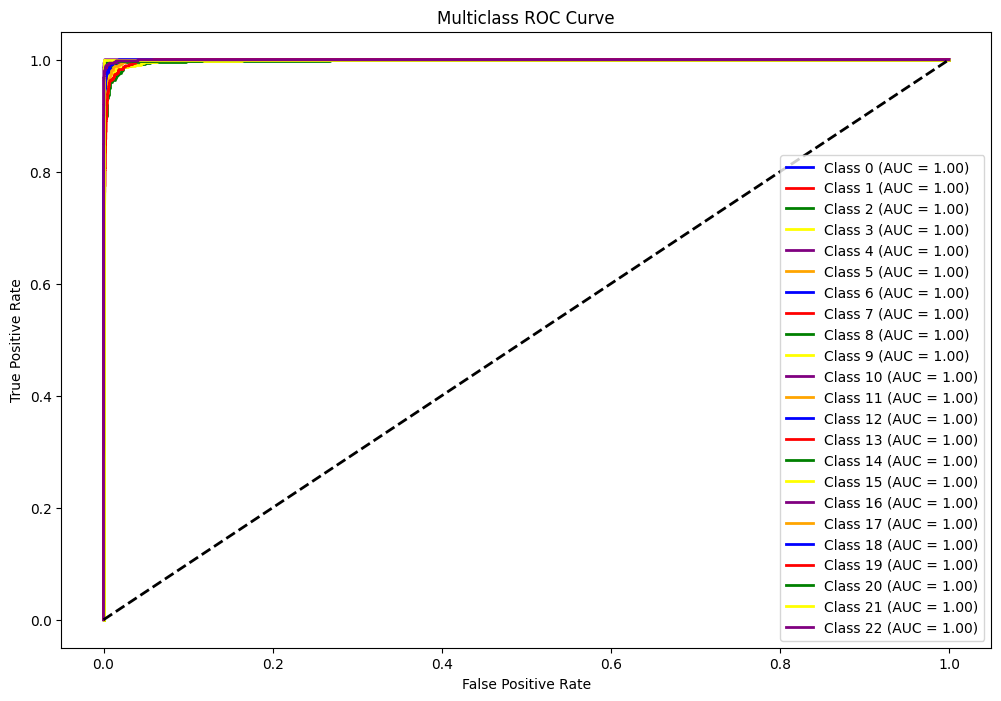

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Get number of classes
num_classes = test_set.element_spec[1].shape[-1]

# Extract true labels
y_true_roc = np.concatenate([y.numpy() for x, y in test_set], axis=0)  # Convert to NumPy
y_true_roc = np.argmax(y_true_roc, axis=1)  # Convert to class indices

# Get predicted probabilities
y_pred_prob_roc = model.predict(test_set)  # Predicted probabilities

# Convert y_true to one-hot encoding
y_true_one_hot = label_binarize(y_true_roc, classes=np.arange(num_classes))

# Initialize as proper dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.savefig("ROC Of Multiclass.jpg")
plt.show()


## Fine tuning

In [28]:
from tensorflow.keras.models import load_model

model = load_model("Final_model_1.keras")

In [21]:
from tensorflow.keras.optimizers import Adam

fine_tune_optimizer = Adam(learning_rate=1e-5, clipnorm=1.0)  
model.compile(optimizer=fine_tune_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(training_set, validation_data=validation_set, epochs=50, callbacks=[early_stop])


Epoch 1/50
2666/2666 [==============================] - 165s 62ms/step - loss: 0.0375 - accuracy: 0.9985 - val_loss: 0.1207 - val_accuracy: 0.9791
Epoch 2/50
2666/2666 [==============================] - 164s 62ms/step - loss: 0.0374 - accuracy: 0.9983 - val_loss: 0.1189 - val_accuracy: 0.9786
Epoch 3/50
2666/2666 [==============================] - 164s 62ms/step - loss: 0.0373 - accuracy: 0.9982 - val_loss: 0.1084 - val_accuracy: 0.9802
Epoch 4/50
2666/2666 [==============================] - 165s 62ms/step - loss: 0.0369 - accuracy: 0.9982 - val_loss: 0.1093 - val_accuracy: 0.9796
Epoch 5/50
2666/2666 [==============================] - 165s 62ms/step - loss: 0.0366 - accuracy: 0.9981 - val_loss: 0.1146 - val_accuracy: 0.9775
Epoch 6/50
2666/2666 [==============================] - 165s 62ms/step - loss: 0.0364 - accuracy: 0.9980 - val_loss: 0.1143 - val_accuracy: 0.9789


In [26]:
val_loss,val_accuracy=model.evaluate(validation_set)

667/667 [==============================] - 12s 17ms/step - loss: 0.1084 - accuracy: 0.9802


In [8]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

334/334 [==============================] - 9s 26ms/step


(array([[1.0000000e+00, 1.5781603e-09, 3.9667413e-18, ..., 1.7414612e-22,
         1.4773098e-19, 6.3063286e-16],
        [1.0000000e+00, 8.7100067e-12, 2.6687667e-18, ..., 8.3120607e-25,
         2.5410825e-21, 1.3696408e-18],
        [1.0000000e+00, 3.3505346e-13, 1.7410742e-18, ..., 3.0514863e-25,
         4.7737672e-20, 7.2653953e-17],
        ...,
        [1.2007416e-13, 9.3020258e-16, 1.0400027e-12, ..., 1.0852568e-15,
         3.3612568e-14, 9.9999952e-01],
        [2.2158400e-10, 6.4281114e-14, 8.9845969e-12, ..., 7.9045711e-13,
         4.4528183e-15, 9.9999952e-01],
        [1.9956414e-23, 2.5559317e-26, 3.7880142e-24, ..., 1.4234425e-29,
         1.0738299e-22, 1.0000000e+00]], dtype=float32),
 (10660, 23))

In [9]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(10660,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)>

In [10]:
true_categories=tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(10660, 23), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [11]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(10660,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)>

In [33]:
cm= confusion_matrix(y_true,predicted_categories)
cm

array([[491,   3,   0,   3,   0,   0,   1,   0,   0,   0,   1,   0,   0,
          1,   0,   0,   0,   2,   0,   2,   0,   0,   0],
       [  0, 496,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 439,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0, 497,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2,   0,   0,   1,   1,   0,   0,   0],
       [  1,   0,   0,   0, 416,   0,   1,   0,   0,   0,   0,   0,   2,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0, 455,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0, 383,   3,  22,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4, 471,   0,   0,   0,   0,   0,
   

## Validation

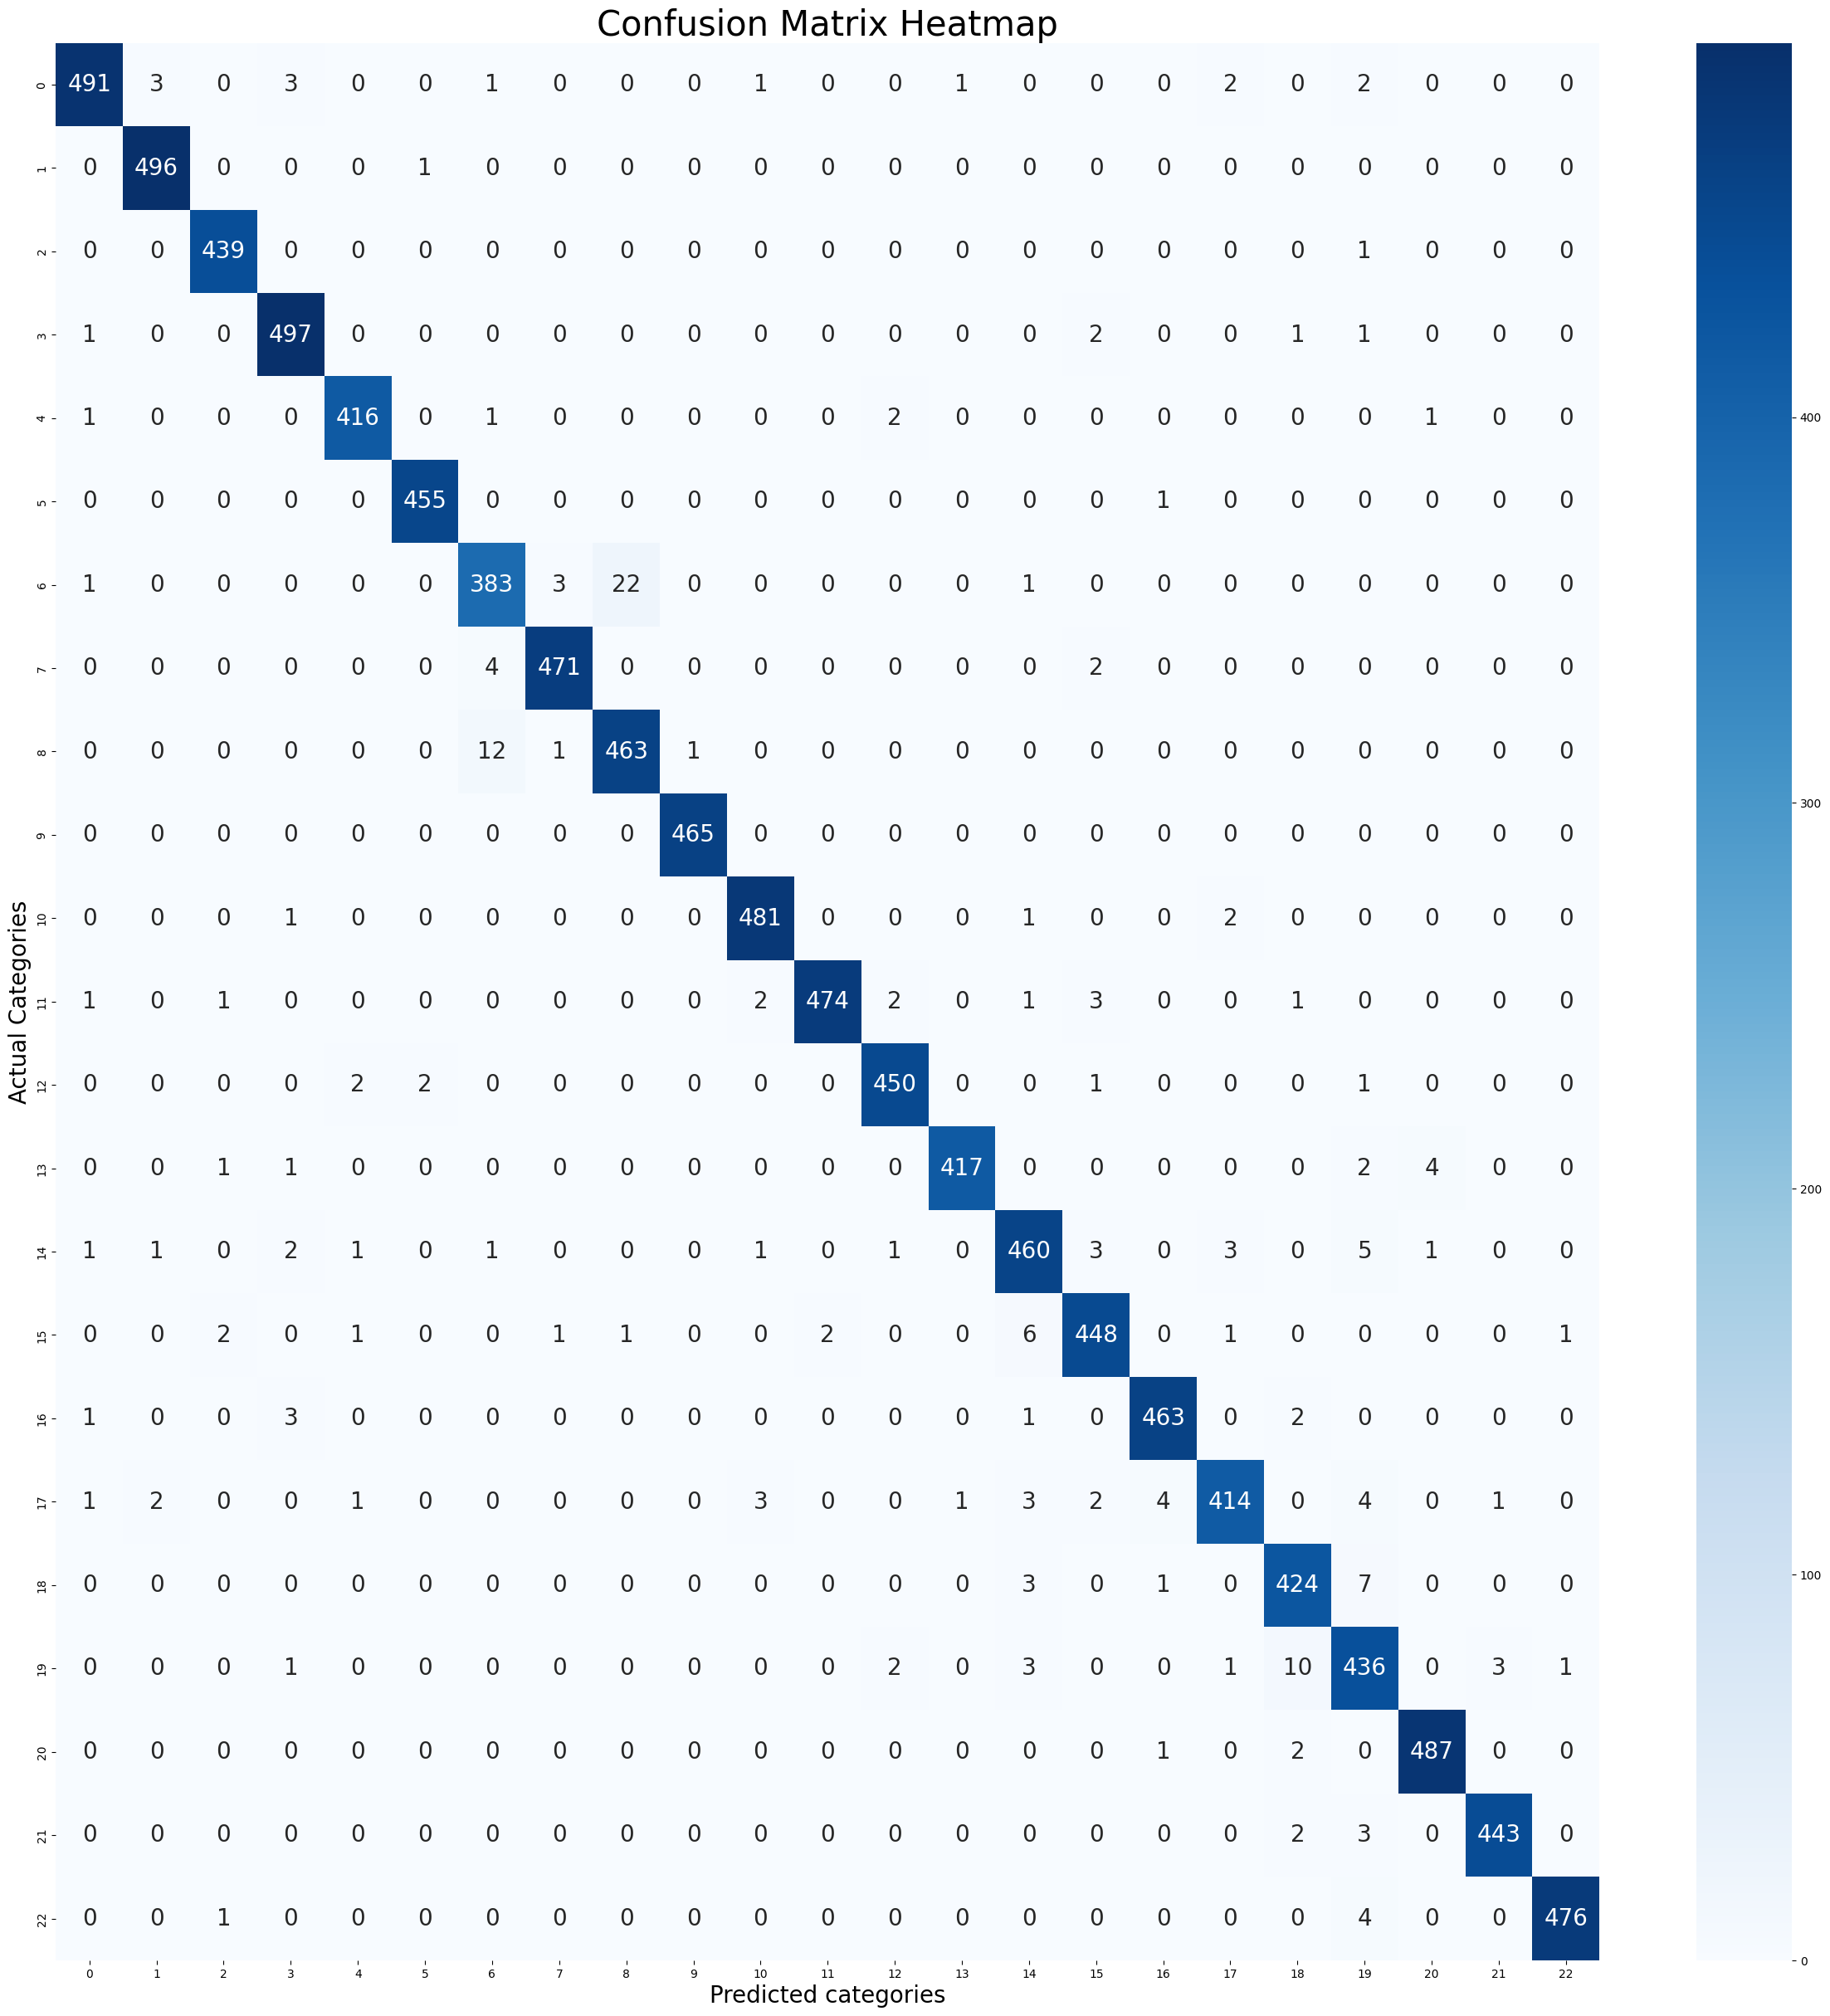

In [34]:
plt.figure(figsize=(30,30))
plt.title("Confusion Matrix Heatmap", fontsize=30)
sbn.heatmap(cm, annot=True, fmt="d", cmap="Blues",annot_kws={'size':20})
plt.xlabel("Predicted categories", fontsize=20)
plt.ylabel("Actual Categories", fontsize=20)
plt.savefig("Confusion Matrixfor96_2.jpg")
plt.show()

In [36]:
class_report=classification_report(y_true,predicted_categories,target_names=classes)
print(class_report)

                                             precision    recall  f1-score   support

                                 Apple Scab       0.99      0.97      0.98       504
                            Apple Black Rot       0.99      1.00      0.99       497
                     Apple Cedar Apple Rust       0.99      1.00      0.99       440
                              Apple Healthy       0.98      0.99      0.98       502
     Cherry (Including Sour) Powdery Mildew       0.99      0.99      0.99       421
            Cherry (Including Sour) Healthy       0.99      1.00      1.00       456
Corn (Maize) Cercospora Leaf Spot/Grey Leaf       0.95      0.93      0.94       410
                   Corn (Maize) Common Rust       0.99      0.99      0.99       477
          Corn (Maize) Northern Leaf Blight       0.95      0.97      0.96       477
                       Corn (Maize) Healthy       1.00      1.00      1.00       465
                        Potato Early Blight       0.99      0.99

In [38]:
with open("Classifcation_report_new.txt","w") as file:
    file.write(class_report)

334/334 [==============================] - 9s 27ms/step


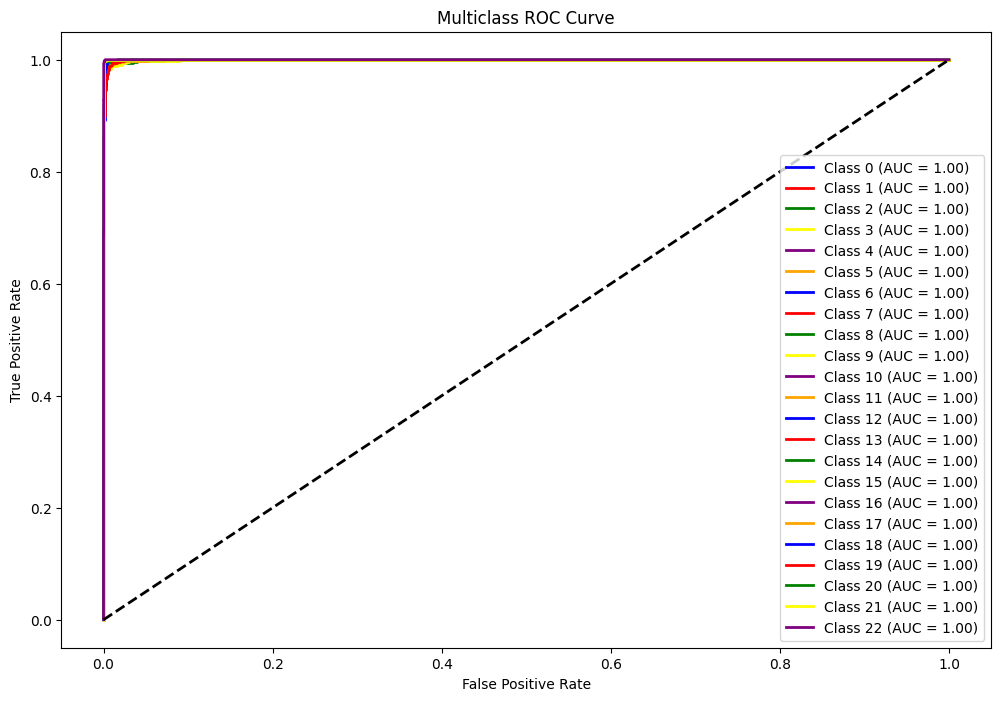

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Get number of classes
num_classes = test_set.element_spec[1].shape[-1]

# Extract true labels
y_true_roc = np.concatenate([y.numpy() for x, y in test_set], axis=0)  # Convert to NumPy
y_true_roc = np.argmax(y_true_roc, axis=1)  # Convert to class indices

# Get predicted probabilities
y_pred_prob_roc = model.predict(test_set)  # Predicted probabilities

# Convert y_true to one-hot encoding
y_true_one_hot = label_binarize(y_true_roc, classes=np.arange(num_classes))

# Initialize as proper dictionaries
fpr, tpr, roc_auc = dict(), dict(), dict()

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.savefig("ROC Of Multiclass_new.jpg")
plt.show()


## Testing

In [29]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

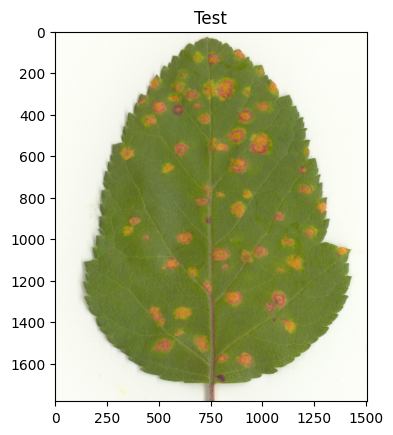

In [30]:
source="C:\\Users\\alami\\Downloads\\car-apple9.jpg"
img=cv2.imread(source)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test")
plt.show()


In [34]:
image=tf.keras.preprocessing.image.load_img(source,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [35]:
pred=model.predict(input_arr)
pred.shape

1/1 [==============================] - 0s 176ms/step


(1, 23)

In [36]:
result=np.argmax(pred)
confidence=np.max(pred)
print(result)
print(confidence)

2
1.0


In [37]:
class_pred=classes[result]
class_pred

'Apple Cedar Apple Rust'

In [38]:
model.save("Final_model_1.keras")

In [39]:
model.save("Final_model_1.h5")

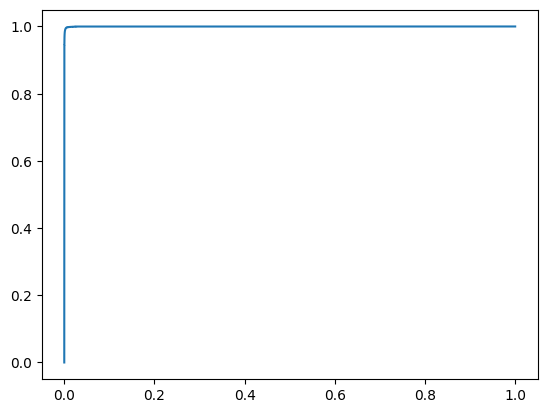